In [1]:
%matplotlib ipympl
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.ndimage import gaussian_filter
#from vizlib import *

In [2]:
#filename = "/media/matt/SCRATCH/ActiveMatterWorms/data_02_02_2024/filament_data.npz"

#filename = "/media/matt/DATA/data_22_05_2024/filament_data.npz"
filename = "/media/matt/DATA/osc_data/data_15_05_2024-2/filament_data.npz"
data = np.load(filename)
pos_data = data['a']
vel_data = data['b']
print(vel_data.shape)
N = data['a'].shape[1]
nframes = data['a'].shape[0]
print(N)
print(nframes)

(1272, 144000, 3)
144000
1272


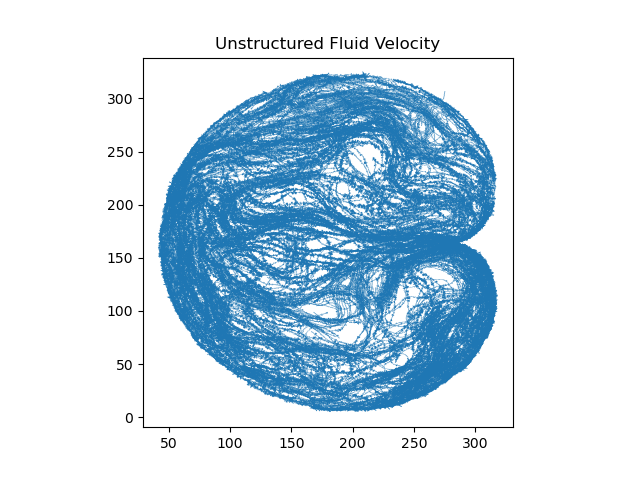

In [3]:
fig,ax = plt.subplots(1,1)
quiver = ax.quiver(pos_data[-1,:,0], #x
                   pos_data[-1,:,1], #y
                   vel_data[-1,:,0], #u
                   vel_data[-1,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
ax.set_title("Unstructured Fluid Velocity")
plt.show()

X: 0.986801028251648 316.4320068359375 315.44520580768585
Y: 1.0241400003433228 316.35198974609375 315.3278497457504


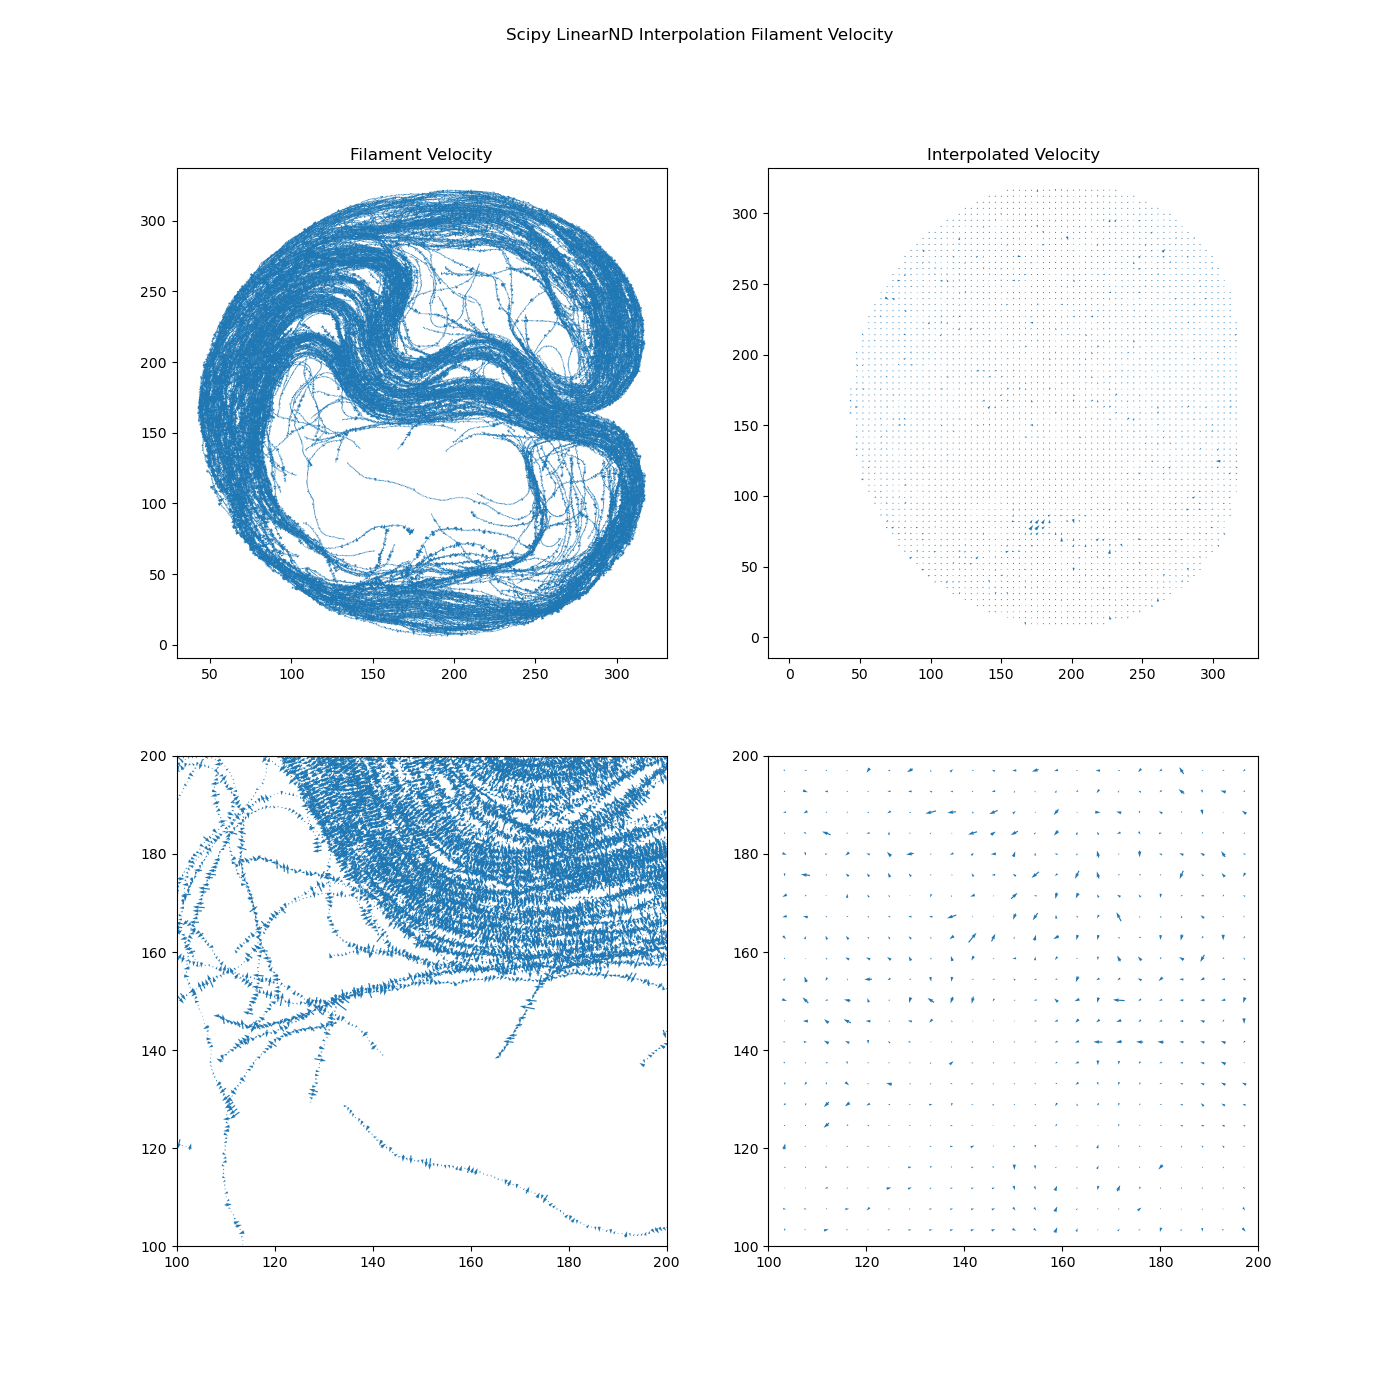

In [5]:
max_x = np.max(pos_data[:,0])
min_x = np.min(pos_data[:,0])
max_y = np.max(pos_data[:,1])
min_y = np.min(pos_data[:,1])
print("X:",min_x,max_x,max_x-min_x)
print("Y:",min_y,max_y,max_y-min_y)
iframe = -1
# create structured grid
interp_step = 1
grid_x,grid_y = np.meshgrid(np.arange(min_x,max_x,interp_step),
                           np.arange(min_y,max_y,interp_step))
num_interpolation_points = 75
grid_x,grid_y = np.meshgrid(np.linspace(min_x,max_x,num=num_interpolation_points),
                           np.linspace(min_y,max_y,num=num_interpolation_points))

# Interpolate the x and y components separately
lnd_x = interpolate.LinearNDInterpolator(np.column_stack((pos_data[iframe,:,0],pos_data[iframe,:,1])),vel_data[iframe,:,0])
grid_u = lnd_x(np.column_stack((grid_x.ravel(),grid_y.ravel())))

lnd_y = interpolate.LinearNDInterpolator(np.column_stack((pos_data[iframe,:,0],pos_data[iframe,:,1])),vel_data[iframe,:,1])
grid_v = lnd_y(np.column_stack((grid_x.ravel(),grid_y.ravel())))

# merged everything back together to make single object
lnd_vel_field = np.column_stack((grid_x.flatten(), grid_y.flatten(), grid_u.flatten(), grid_v.flatten()))


"""plotting the vectors of each of the averaged particle data"""
fig,axs = plt.subplots(2, 2,figsize=(14,14))
fig.suptitle("Scipy LinearND Interpolation Filament Velocity")
quiver = axs[0,0].quiver(pos_data[iframe,:,0], #x
                   pos_data[iframe,:,1], #y
                   vel_data[iframe,:,0], #u
                   vel_data[iframe,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[0,0].set_box_aspect(1)
axs[0,0].set_adjustable("datalim")
axs[0,0].set_title('Filament Velocity')
quiver = axs[0,1].quiver(lnd_vel_field[:,0], #x
                   lnd_vel_field[:,1], #y
                   lnd_vel_field[:,2], #u
                   lnd_vel_field[:,3], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[0,1].set_box_aspect(1)
axs[0,1].set_title('Interpolated Velocity')
axs[0,1].set_adjustable("datalim")

quiver = axs[1,0].quiver(pos_data[iframe,:,0], #x
                   pos_data[iframe,:,1], #y
                   vel_data[iframe,:,0], #u
                   vel_data[iframe,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[1,0].set_box_aspect(1)
axs[1,0].set_adjustable("datalim")
axs[1,0].set_xlim(100,200)
axs[1,0].set_ylim(100,200)
quiver = axs[1,1].quiver(lnd_vel_field[:,0], #x
                   lnd_vel_field[:,1], #y
                   lnd_vel_field[:,2], #u
                   lnd_vel_field[:,3], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[1,1].set_box_aspect(1)
axs[1,1].set_adjustable("datalim")
axs[1,1].set_xlim(100,200)
axs[1,1].set_ylim(100,200)
plt.show()

X: 0.986801028251648 316.4320068359375 315.44520580768585
Y: 1.0241400003433228 316.35198974609375 315.3278497457504
vorticity (100, 100)


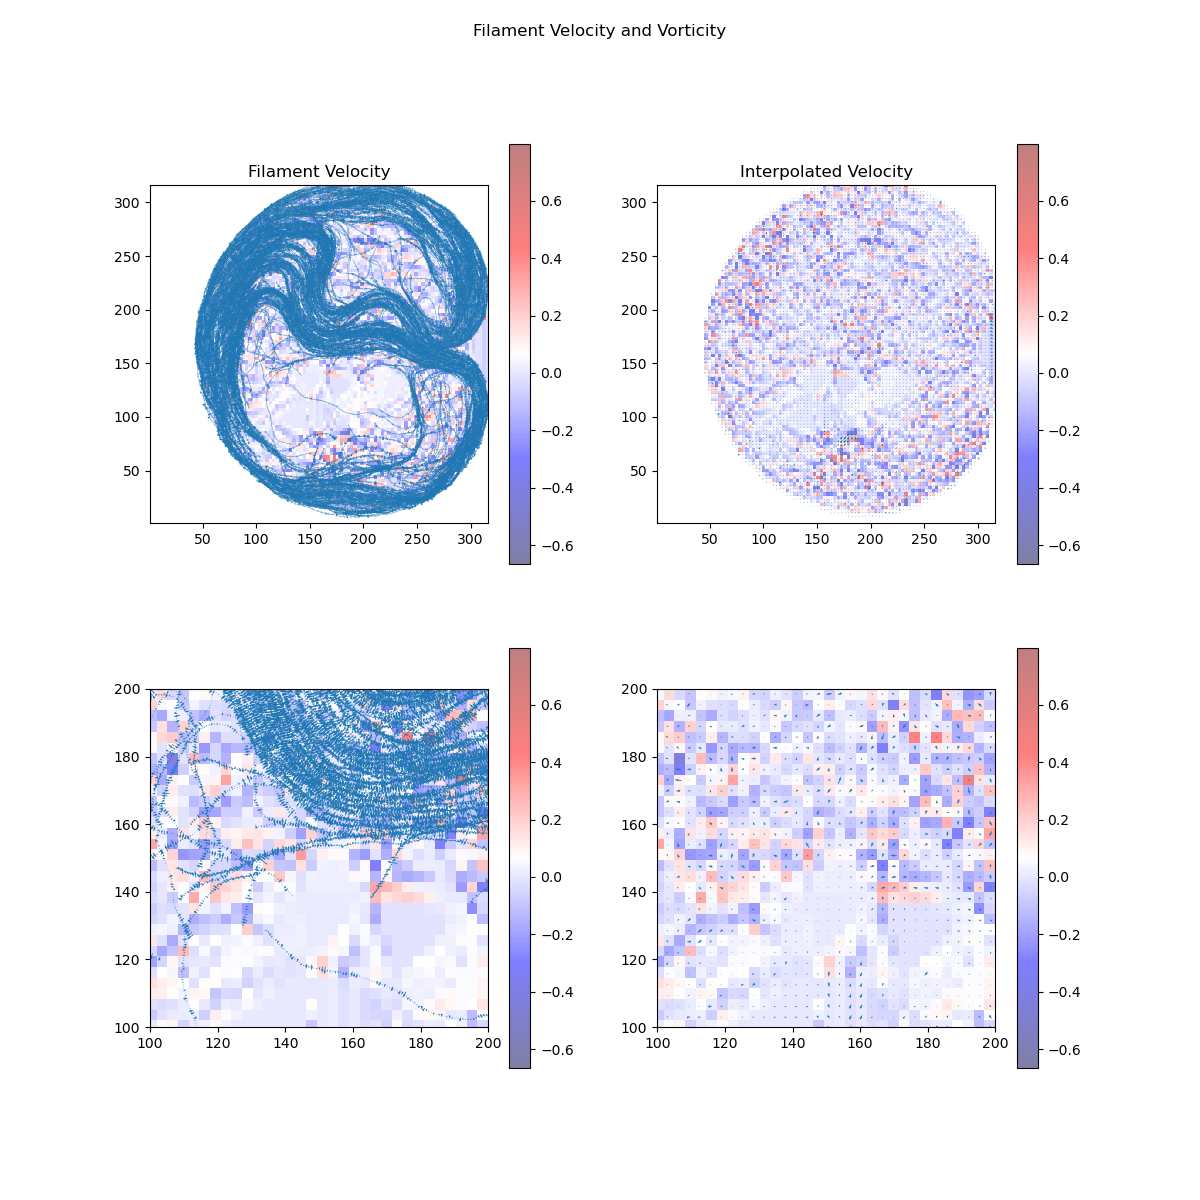

In [6]:
max_x = np.max(pos_data[:,0])
min_x = np.min(pos_data[:,0])
max_y = np.max(pos_data[:,1])
min_y = np.min(pos_data[:,1])
print("X:",min_x,max_x,max_x-min_x)
print("Y:",min_y,max_y,max_y-min_y)
iframe = -1
# create structured grid
interp_step = 1
grid_x,grid_y = np.meshgrid(np.arange(min_x,max_x,interp_step),
                           np.arange(min_y,max_y,interp_step))
num_interpolation_points = 100
grid_x,grid_y = np.meshgrid(np.linspace(min_x,max_x,num=num_interpolation_points),
                           np.linspace(min_y,max_y,num=num_interpolation_points))
# Interpolate the x and y components separately using bilinear interpolation
grid_u = interpolate.griddata((pos_data[iframe,:,0], pos_data[iframe,:,1]), vel_data[iframe,:,0], (grid_x, grid_y), method='linear')
grid_v = interpolate.griddata((pos_data[iframe,:,0], pos_data[iframe,:,1]), vel_data[iframe,:,1], (grid_x, grid_y), method='linear')
# merged everything back together to make single object
structured_vector_field = np.column_stack((grid_x.flatten(), grid_y.flatten(), grid_u.flatten(), grid_v.flatten()))

vel_mag = np.sqrt(structured_vector_field[:,2]**2 + structured_vector_field[:,3]**2)
vorticity = np.gradient(np.reshape(structured_vector_field[:,3],grid_x.shape), axis=0) - np.gradient(np.reshape(structured_vector_field[:,2],grid_x.shape), axis=0)
print("vorticity",vorticity.shape)
"""plotting the vectors of each of the averaged particle data"""
fig,axs = plt.subplots(2, 2,figsize=(12,12))
fig.suptitle("Filament Velocity and Vorticity")
quiver = axs[0,0].quiver(pos_data[iframe,:,0], #x
                   pos_data[iframe,:,1], #y
                   vel_data[iframe,:,0], #u
                   vel_data[iframe,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[0,0].set_box_aspect(1)
axs[0,0].set_adjustable("datalim")
pcm = axs[0,0].imshow(vorticity,cmap="seismic",alpha=0.5,origin="lower",extent=(min_x,max_x,min_y,max_y))
fig.colorbar(pcm, ax=axs[0,0])
axs[0,0].set_title('Filament Velocity')

quiver = axs[0,1].quiver(structured_vector_field[:,0], #x
                   structured_vector_field[:,1], #y
                   structured_vector_field[:,2], #u
                   structured_vector_field[:,3], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[0,1].set_box_aspect(1)
axs[0,1].set_title('Interpolated Velocity')
axs[0,1].set_adjustable("datalim")
pcm = axs[0,1].imshow(vorticity,cmap="seismic",alpha=0.5,origin="lower",extent=(min_x,max_x,min_y,max_y))
fig.colorbar(pcm, ax=axs[0,1])

quiver = axs[1,0].quiver(pos_data[iframe,:,0], #x
                   pos_data[iframe,:,1], #y
                   vel_data[iframe,:,0], #u
                   vel_data[iframe,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[1,0].set_box_aspect(1)
axs[1,0].set_adjustable("datalim")
axs[1,0].set_xlim(100,200)
axs[1,0].set_ylim(100,200)
pcm = axs[1,0].imshow(vorticity,cmap="seismic",alpha=0.5,origin="lower",extent=(min_x,max_x,min_y,max_y))
fig.colorbar(pcm, ax=axs[1,0])

quiver = axs[1,1].quiver(structured_vector_field[:,0], #x
                   structured_vector_field[:,1], #y
                   structured_vector_field[:,2], #u
                   structured_vector_field[:,3], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
axs[1,1].set_box_aspect(1)
axs[1,1].set_adjustable("datalim")
axs[1,1].set_xlim(100,200)
axs[1,1].set_ylim(100,200)
pcm = axs[1,1].imshow(vorticity,cmap="seismic",alpha=0.5,origin="lower",extent=(min_x,max_x,min_y,max_y))
fig.colorbar(pcm, ax=axs[1,1])
plt.show()

In [4]:
from tqdm.auto import tqdm
max_x = np.max(pos_data[:,0])
min_x = np.min(pos_data[:,0])
max_y = np.max(pos_data[:,1])
min_y = np.min(pos_data[:,1])
print("X:",min_x,max_x,max_x-min_x)
print("Y:",min_y,max_y,max_y-min_y)
num_interpolation_points = 60
vorticity = np.zeros((nframes,num_interpolation_points,num_interpolation_points))
for iframe in tqdm(np.arange(nframes)[50:504]):
    grid_x,grid_y = np.meshgrid(np.linspace(min_x,max_x,num=num_interpolation_points),
                              np.linspace(min_y,max_y,num=num_interpolation_points))
    # Interpolate the x and y components separately using bilinear interpolation
    grid_u = interpolate.griddata((pos_data[iframe,:,0], pos_data[iframe,:,1]), vel_data[iframe,:,0], (grid_x, grid_y), method='linear')
    grid_v = interpolate.griddata((pos_data[iframe,:,0], pos_data[iframe,:,1]), vel_data[iframe,:,1], (grid_x, grid_y), method='linear')
    # merged everything back together to make single object
    structured_vector_field = np.column_stack((grid_x.flatten(), grid_y.flatten(), grid_u.flatten(), grid_v.flatten()))

    #vel_mag = np.sqrt(structured_vector_field[:,2]**2 + structured_vector_field[:,3]**2)
    vorticity[iframe,:,:] = np.gradient(np.reshape(structured_vector_field[:,3],grid_x.shape), axis=0) - np.gradient(np.reshape(structured_vector_field[:,2],grid_x.shape), axis=0)

X: 0.0 321.864013671875 321.864013671875
Y: 0.0 321.4150085449219 321.4150085449219


  0%|          | 0/454 [00:00<?, ?it/s]

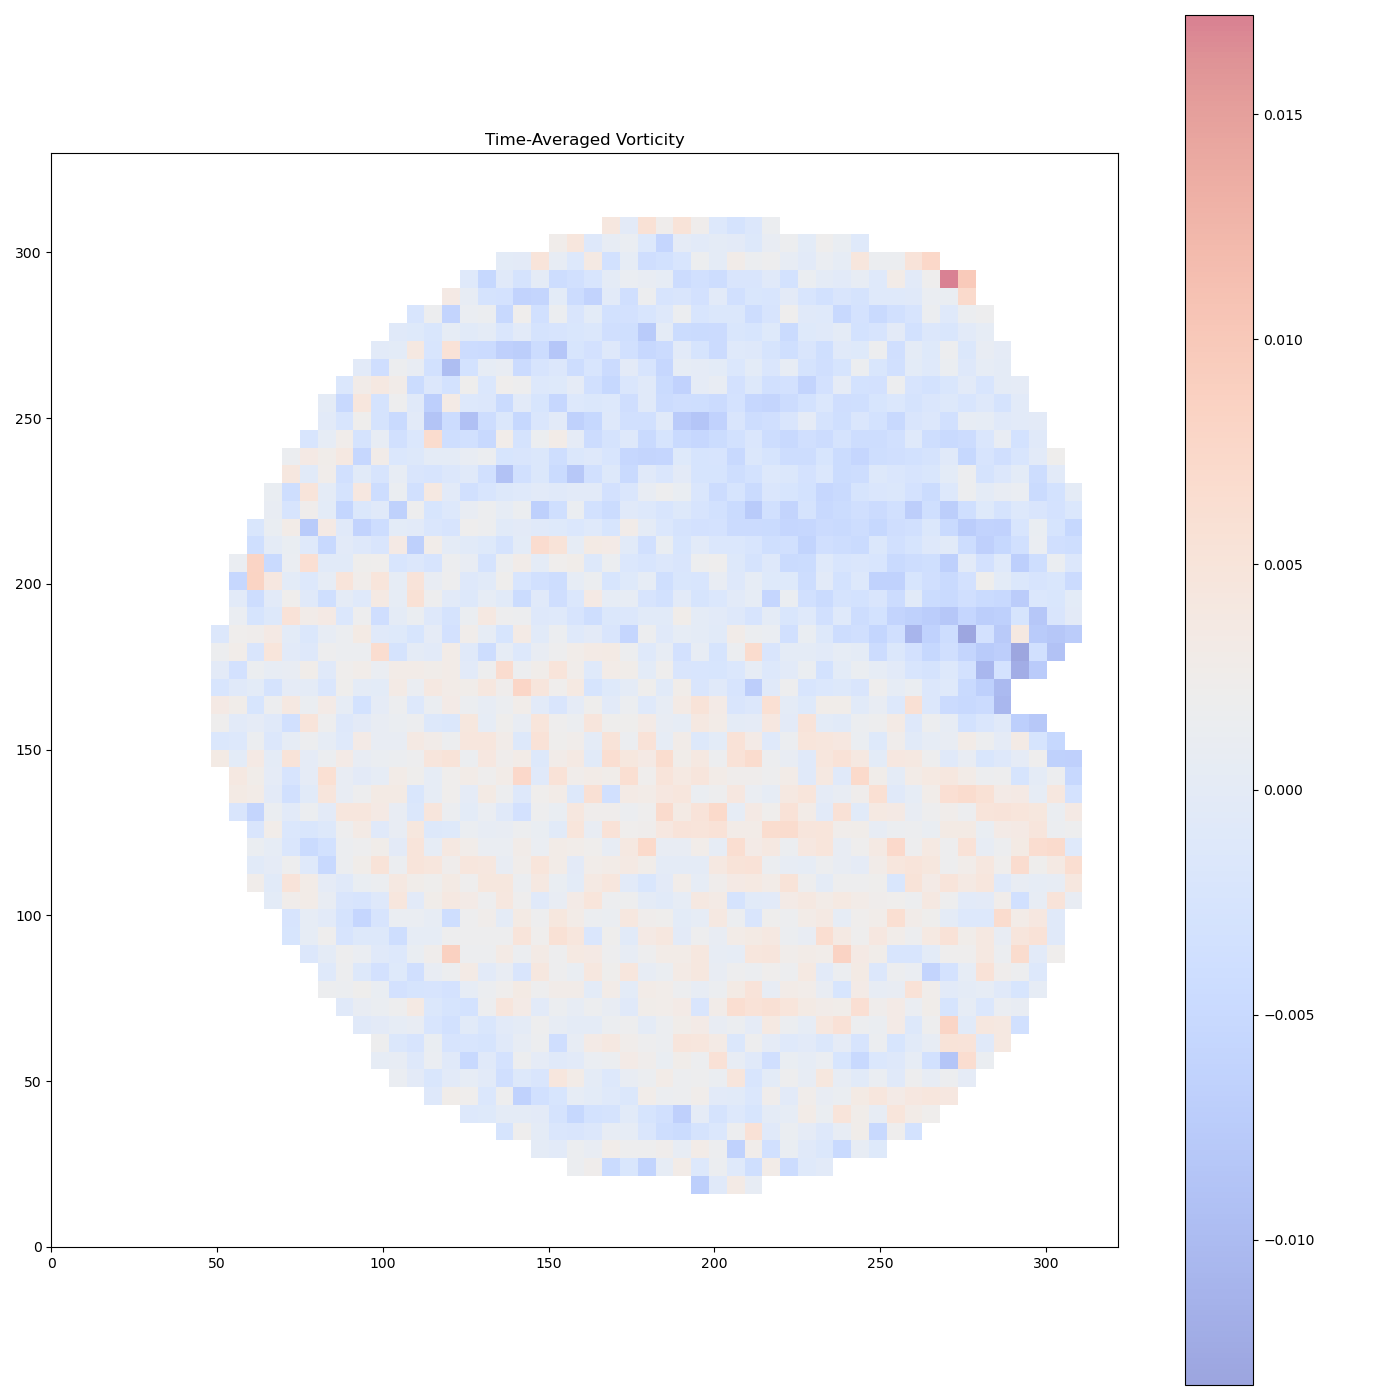

In [5]:
ta_vorticity = np.zeros((num_interpolation_points,num_interpolation_points))
for iframe in np.arange(nframes)[100:-1]:
   ta_vorticity += vorticity[iframe,:,:]

#drawing the cardioid
rwall=164
c_a = 1.5*(rwall/2)
t = np.linspace(0,2*np.pi,1000)
cx = c_a * (1 - np.cos(t)) * np.cos(t) + rwall + c_a
cy = c_a * (1 - np.cos(t)) * np.sin(t) + rwall
ta_vorticity[25:36,-2] = np.nan
ta_vorticity[28:34,-3] = np.nan
ta_vorticity[29:33,-4] = np.nan
ta_vorticity[30:32,-5] = np.nan
ta_vorticity[30:32,-6] = np.nan

ta_vorticity = ta_vorticity/nframes
fig,axs = plt.subplots(1, 1,figsize=(14,14))
#fig.suptitle()
#axs.plot(cx,cy,color='k')
pcm = axs.imshow(ta_vorticity,cmap="coolwarm",alpha=0.5,origin="lower",extent=(min_x,max_x,min_y,max_y))#,interpolation='bicubic')
fig.colorbar(pcm, ax=axs)
axs.set_title("Time-Averaged Vorticity")
axs.set_ylim(0,330)
plt.tight_layout()
plt.show()

Old Analysis

In [ ]:
filename = "/Volumes/DATA/data_03_12_2023/amatter_03_12_2023-1.xyzv"
#filename = "/media/matt/SCRATCH/ActiveMatterWorms/data_01_12_2023-3/amatter.xyzv"
frames = []
worms_start_end = []
fluid_start_end = []
with open(filename) as f:
    N = int(f.readline().strip())
    print(N," particles per frame")
    f.seek(0)
    line_count = 0
    for line in f:
        line_count += 1
        if (str(N) in line.strip()) and ("A" not in line.strip()) and ("B" not in line.strip()) and ("S" not in line.strip()) and ("I" not in line.strip()) and ("E" not in line.strip()):
            frames.append([line.strip(),line_count+1,line_count+N+1]) # number of particles, data start, data end
print("Loading ",len(frames)," frames of data...")
print(frames)

# counting number of worms and number of fluid particles in each frame
with open(filename) as f:
    raw_data = f.readlines()[frames[0][1]:frames[0][2]]
    for iline in range(len(raw_data)):
        line = raw_data[iline]
        raw_data[iline] = line.strip()
    worm_count = 0
    fluid_count = 0
    worm_line_start = 0
    worm_line_end = 0
    fluid_line_start_offset = 0
    fluid_line_start = 0
    fluid_line_end = 0
    for (i,line) in enumerate(raw_data):
        if ("A" not in line) and ("B" not in line) and ("I" not in line) and ("E" not in line): # then it must be a fluid particle
            fluid_count += 1
            if fluid_line_start == 0:
                fluid_line_start = i
        if ("S" not in line) and ("I" not in line) and ("E" not in line):
            worm_count += 1

worm_line_start = frames[0][1]
worm_line_end = worm_line_start + worm_count - 3 #idk why this is 3
fluid_line_end = fluid_line_start + fluid_count
fluid_line_start_offset = fluid_line_start - worm_line_end
print("# of fluid particles",fluid_count,fluid_line_start,fluid_line_end,fluid_line_start_offset)
print("# of worm particles",worm_count)

worm_pos_data = np.zeros((len(frames),worm_count,3))
worm_vel_data = np.zeros((len(frames),worm_count,3))
fluid_pos_data = np.zeros((len(frames),fluid_count,3))
fluid_vel_data = np.zeros((len(frames),fluid_count,3))
with open(filename) as f:
    #frame_data = np.zeros((N,6))
    raw_data = f.readlines()
    for iline in range(len(raw_data)):
        line = raw_data[iline]
        raw_data[iline] = line.strip()
    for frame in tqdm.tqdm(range(len(frames))):
        data_line_start = frames[frame][1]
        data_line_end = frames[frame][2]
        raw_frame_data_list = raw_data[data_line_start:data_line_end] # strips "A/B"

        fluid_line_start = 0
        for (i,line) in enumerate(raw_frame_data_list):
            if ("A" not in line) and ("B" not in line) and ("I" not in line) and ("E" not in line): # then it must be a fluid particle
                if fluid_line_start == 0:
                    fluid_line_start = i

        fluid_line_end = fluid_line_start + fluid_count
        worm_line_start = frames[frame][1]
        worm_line_end = worm_line_start + worm_count - 3 #idk why this is 3

        for (i,line) in enumerate(raw_frame_data_list[worm_line_start:worm_line_end]):
            line_data = [float(val) for val in line[1:].split()]
            worm_pos_data[frame,i,:] = line_data[0:3]
            worm_vel_data[frame,i,:] = line_data[3:6]
        
        for (i,line) in enumerate(raw_frame_data_list[fluid_line_start:fluid_line_end]):
            line_data = [float(val) for val in line[1:].split()]
            fluid_pos_data[frame,i,:] = line_data[0:3]
            fluid_vel_data[frame,i,:] = line_data[3:6]



In [ ]:
fig,ax = plt.subplots(1,1)
quiver = ax.quiver(fluid_pos_data[-1,:,0], #x
                   fluid_pos_data[-1,:,1], #y
                   fluid_vel_data[-1,:,0], #u
                   fluid_vel_data[-1,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
ax.set_title("Unstructured Fluid Velocity")
plt.show()

In [ ]:
vorticity = np.gradient(fluid_vel_data[-1,:,1], axis=0) - np.gradient(fluid_vel_data[-1,:,0], axis=0)
fig,ax = plt.subplots(1,1)
quiver = ax.quiver(fluid_pos_data[-1,:,0], #x
                   fluid_pos_data[-1,:,1], #y
                   fluid_vel_data[-1,:,0], #u
                   fluid_vel_data[-1,:,1], #v,
                   vorticity,
                   pivot='mid',
                   cmap='viridis',
                   scale_units='xy',
                   scale=0.25
)
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
cbar = plt.colorbar(quiver, ax=ax)
cbar.set_label('Vorticity')
ax.set_title("Unstructured Fluid Velocity")
plt.show()

In [ ]:
vorticity = np.gradient(fluid_vel_data[-1,:,1], axis=0) - np.gradient(fluid_vel_data[-1,:,0], axis=0)
rot_dir = np.sign(vorticity)
fig,ax = plt.subplots(1,1)
quiver = ax.quiver(fluid_pos_data[-1,:,0], #x
                   fluid_pos_data[-1,:,1], #y
                   fluid_vel_data[-1,:,0], #u
                   fluid_vel_data[-1,:,1], #v,
                   rot_dir,
                   pivot='mid',
                   #color=vorticity,
                   cmap='jet',
                   scale_units='xy',
                   scale=0.25
)
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
cbar = plt.colorbar(quiver, ax=ax)
cbar.set_label('(Red, counterclockwise) (Blue, clockwise)')
ax.set_title("Unstructured Fluid Velocity")
plt.show()

In [ ]:
""" animating the previous plot"""
from matplotlib.animation import FuncAnimation

# Assuming you have a list of vector fields called 'vector_fields'
vector_fields = []
for iframe in tqdm.tqdm(range(len(frames))):
    vector_field_frame = np.zeros((fluid_count,6))
    vector_field_frame[:,0:3] = fluid_pos_data[iframe]
    vector_field_frame[:,3:6] = fluid_vel_data[iframe]
    #vector_field_frame = get_particle_vecs_frame(N,iframe,pos_data,disp=False)
    #vector_grid_frame = interp_particle_vecs(vector_field_frame,100,"cubic",disp=False)
    vector_fields.append(vector_field_frame)
    
fig, ax = plt.subplots(1, 1)

def update(frame):
    ax.clear()
    vector_grid = vector_fields[frame]
    vorticity = np.gradient(vector_grid[:,3], axis=0) - np.gradient(vector_grid[:,4], axis=0)
    rot_dir = np.sign(vorticity)
    quiver = ax.quiver(vector_grid[:, 0], vector_grid[:, 1], vector_grid[:, 3], vector_grid[:, 4],
                       #rot_dir,
                       vorticity,
                       cmap = 'jet',
                       pivot='mid',
                       color="tab:blue",
                       scale_units='xy',
                       scale=0.25
                       )
    ax.set_box_aspect(1)
    ax.set_adjustable("datalim")
    #cbar = plt.colorbar(quiver, ax=ax)
    #cbar.set_label('Vorticity')
    ax.set_title(f'Unstructured Fluid Velocity, Timestep {frame}')
    
# Create the animation
animation = FuncAnimation(fig, update, frames=len(vector_fields), interval=100, repeat=False)
#saving the animation
animation.save('fluid_vel_vort_animation.mp4', writer='ffmpeg', fps=25)
#plt.show()
print("Done")

In [ ]:
#extend of the particles in +x,-x,+y,-y
vector_field = np.zeros((fluid_count,6))
vector_field[:,0:3] = fluid_pos_data[-1,:,:]
vector_field[:,3:6] = fluid_vel_data[-1,:,:]

num_interpolation_points = 100
interpolation_type = "linear"
max_x = np.max(vector_field[:,0])
min_x = np.min(vector_field[:,0])
max_y = np.max(vector_field[:,1])
min_y = np.min(vector_field[:,1])
print("X:",min_x,max_x,max_x-min_x)
print("Y:",min_y,max_y,max_y-min_y)

# create structured grid
#num_interpolation_points = 100
grid_x,grid_y = np.meshgrid(np.linspace(min_x,max_x,num=num_interpolation_points),
                            np.linspace(min_y,max_y,num=num_interpolation_points))
# Create points for interpolation
points = np.column_stack((vector_field[:,0], vector_field[:,1]))
# Interpolate the x and y components separately using bilinear interpolation
grid_u = interpolate.griddata(points, vector_field[:,3], (grid_x, grid_y), method=interpolation_type)
grid_v = interpolate.griddata(points, vector_field[:,4], (grid_x, grid_y), method=interpolation_type)
# merged everything back together to make single object
structured_vector_field = np.column_stack((grid_x.flatten(), grid_y.flatten(), grid_u.flatten(), grid_v.flatten()))
# normalize the vector parts
n = np.sqrt(structured_vector_field[:,2] ** 2 + structured_vector_field[:,3] ** 2)
structured_vector_field[:,2] = structured_vector_field[:,2]/n
structured_vector_field[:,3] = structured_vector_field[:,3]/n

# replace nans with 0.0
np.nan_to_num(structured_vector_field[:,2], copy=False, nan=0.0)
np.nan_to_num(structured_vector_field[:,3], copy=False, nan=0.0)

"""plotting the vectors of each grid"""
vorticity = np.gradient(structured_vector_field[:,3], axis=0) - np.gradient(structured_vector_field[:,2], axis=0)
vorticity_grid = np.reshape(vorticity,(num_interpolation_points,num_interpolation_points))
fig,ax = plt.subplots(1,1,figsize=(8,8))
quiver = ax.quiver(structured_vector_field[:,0], #x
                   structured_vector_field[:,1], #y
                   structured_vector_field[:,2], #u
                   structured_vector_field[:,3], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.5
)
pcm = ax.imshow(vorticity_grid,cmap="jet",interpolation="bilinear",alpha=0.5,origin="lower",extent=(structured_vector_field[:,0][0],structured_vector_field[:,0][-1],structured_vector_field[:,1][0],structured_vector_field[:,1][-1]))
cbar = plt.colorbar(pcm, ax=ax)
cbar.set_label('Vorticity')
ax.axis("scaled")
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
ax.set_title("Structured Fluid Velocity")
plt.show()

In [ ]:
vorticity = np.gradient(structured_vector_field[:,3], axis=0) - np.gradient(structured_vector_field[:,2], axis=0)
vorticity_grid = np.reshape(vorticity,(num_interpolation_points,num_interpolation_points))
rot_dir_grid = np.sign(vorticity_grid)
fig,ax = plt.subplots(1,1,figsize=(8,8))
quiver = ax.quiver(structured_vector_field[:,0], #x
                   structured_vector_field[:,1], #y
                   structured_vector_field[:,2], #u
                   structured_vector_field[:,3], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.5
)
pcm = ax.imshow(rot_dir_grid,cmap="jet",interpolation="bilinear",alpha=0.5,origin="lower",extent=(structured_vector_field[:,0][0],structured_vector_field[:,0][-1],structured_vector_field[:,1][0],structured_vector_field[:,1][-1]))
cbar = plt.colorbar(pcm, ax=ax)
cbar.set_label('Rotation')
ax.axis("scaled")
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
ax.set_title("Structured Fluid Velocity")
plt.show()

In [ ]:
assert worm_pos_data[-1,:,0].shape[0] == np.isfinite(worm_pos_data[-1,:,0]).sum()
assert worm_pos_data[-1,:,1].shape[0] == np.isfinite(worm_pos_data[-1,:,1]).sum()
assert worm_vel_data[-1,:,0].shape[0] == np.isfinite(worm_vel_data[-1,:,0]).sum()
assert worm_vel_data[-1,:,1].shape[0] == np.isfinite(worm_vel_data[-1,:,1]).sum()

fig,ax = plt.subplots(1,1)
quiver = ax.quiver(worm_pos_data[-1,:,0], #x
                   worm_pos_data[-1,:,1], #y
                   worm_vel_data[-1,:,0], #u
                   worm_vel_data[-1,:,1], #v
                   pivot='mid',
                   color="tab:blue",
                   scale_units='xy',
                   scale=0.25
)
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
ax.set_title("Unstructured Worm Velocity")
plt.show()

In [ ]:
vorticity = np.gradient(worm_vel_data[-1,:,1], axis=0) - np.gradient(worm_vel_data[-1,:,0], axis=0)
fig,ax = plt.subplots(1,1)
quiver = ax.quiver(worm_pos_data[-1,:,0], #x
                   worm_pos_data[-1,:,1], #y
                   worm_vel_data[-1,:,0], #u
                   worm_vel_data[-1,:,1], #v,
                   vorticity,
                   pivot='mid',
                   #color=vorticity,
                   cmap='viridis',
                   scale_units='xy',
                   scale=0.25
)
ax.set_box_aspect(1)
ax.set_adjustable("datalim")
cbar = plt.colorbar(quiver, ax=ax)
cbar.set_label('Vorticity')
ax.set_title("Unstructured Worm Velocity")
plt.show()